# 22. The Risk-Neutral Measure

**Goal:** Build the binomial pricing model from first principles, derive the risk-neutral probability, and demonstrate the Fundamental Theorem of Asset Pricing (discrete version).

In a complete, arbitrage-free market, there exists a **unique** probability measure $\mathbb{Q}$ under which
discounted asset prices are martingales. The price of any derivative is then:

$$V_0 = \mathbb{E}^{\mathbb{Q}}\!\left[\frac{V_T}{(1+r)^T}\right]$$

We derive this concretely via the **binomial model** and a replication argument.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

## 1-Step Binomial Model and Replication

Stock $S_0$ moves to $S_0 u$ (up) or $S_0 d$ (down) in one period. A risk-free bond grows by factor $(1+r)$.

To replicate a call with payoff $C_u = \max(S_0 u - K, 0)$ and $C_d = \max(S_0 d - K, 0)$,
we hold $\Delta$ shares and $B$ dollars in the bond:

$$\Delta = \frac{C_u - C_d}{S_0(u - d)}, \qquad B = \frac{u\,C_d - d\,C_u}{(u-d)(1+r)}$$

The **no-arbitrage price** is $V_0 = \Delta\,S_0 + B$, which simplifies to
$V_0 = \frac{q\,C_u + (1-q)\,C_d}{1+r}$ where $q = \frac{(1+r) - d}{u - d}$.

Stock: S_u = 120.00, S_d = 85.00
Call payoffs: C_u = 15.00, C_d = 0.00
Replicating portfolio: Delta = 0.4286 shares, B = $-34.6939 in bonds
Price via replication: V = 8.1633
Risk-neutral prob: q = 0.5714
Price via risk-neutral: V = 8.1633
Match: True


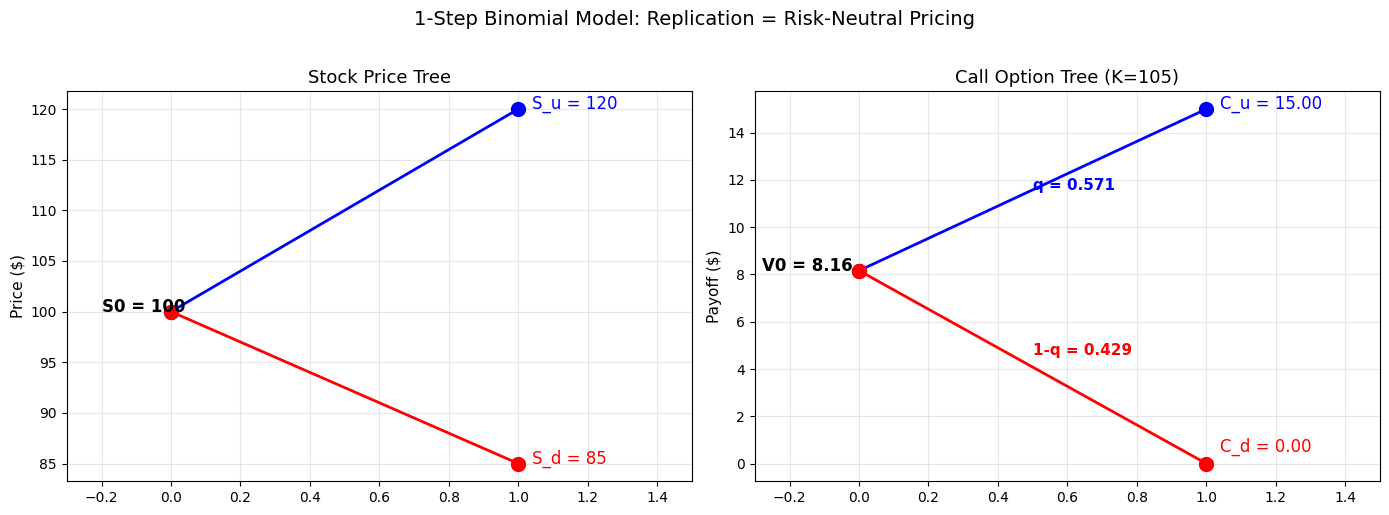

In [2]:
# --- 1-Step Binomial Model ---
S0 = 100.0
K = 105.0
u = 1.20    # up factor
d = 0.85    # down factor
r = 0.05    # risk-free rate per period

# Stock prices at T=1
S_u = S0 * u
S_d = S0 * d

# Call payoffs
C_u = max(S_u - K, 0)
C_d = max(S_d - K, 0)

# Replicating portfolio
Delta = (C_u - C_d) / (S0 * (u - d))
B = (u * C_d - d * C_u) / ((u - d) * (1 + r))
V_replication = Delta * S0 + B

# Risk-neutral probability
q = ((1 + r) - d) / (u - d)
V_risk_neutral = (q * C_u + (1 - q) * C_d) / (1 + r)

print(f"Stock: S_u = {S_u:.2f}, S_d = {S_d:.2f}")
print(f"Call payoffs: C_u = {C_u:.2f}, C_d = {C_d:.2f}")
print(f"Replicating portfolio: Delta = {Delta:.4f} shares, B = ${B:.4f} in bonds")
print(f"Price via replication: V = {V_replication:.4f}")
print(f"Risk-neutral prob: q = {q:.4f}")
print(f"Price via risk-neutral: V = {V_risk_neutral:.4f}")
print(f"Match: {np.isclose(V_replication, V_risk_neutral)}")

# --- Visualization: 1-step tree ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Stock tree
ax1.plot([0, 1], [S0, S_u], 'b-o', linewidth=2, markersize=10)
ax1.plot([0, 1], [S0, S_d], 'r-o', linewidth=2, markersize=10)
ax1.annotate(f'S0 = {S0:.0f}', (0, S0), textcoords='offset points',
             xytext=(-50, 0), fontsize=12, fontweight='bold')
ax1.annotate(f'S_u = {S_u:.0f}', (1, S_u), textcoords='offset points',
             xytext=(10, 0), fontsize=12, color='blue')
ax1.annotate(f'S_d = {S_d:.0f}', (1, S_d), textcoords='offset points',
             xytext=(10, 0), fontsize=12, color='red')
ax1.set_title('Stock Price Tree', fontsize=13)
ax1.set_xlim(-0.3, 1.5); ax1.set_ylabel('Price ($)', fontsize=11)
ax1.grid(True, alpha=0.3)

# Option tree with replication
ax2.plot([0, 1], [V_replication, C_u], 'b-o', linewidth=2, markersize=10)
ax2.plot([0, 1], [V_replication, C_d], 'r-o', linewidth=2, markersize=10)
ax2.annotate(f'V0 = {V_replication:.2f}', (0, V_replication),
             textcoords='offset points', xytext=(-70, 0), fontsize=12, fontweight='bold')
ax2.annotate(f'C_u = {C_u:.2f}', (1, C_u), textcoords='offset points',
             xytext=(10, 0), fontsize=12, color='blue')
ax2.annotate(f'C_d = {C_d:.2f}', (1, max(C_d, 0.5)), textcoords='offset points',
             xytext=(10, 0), fontsize=12, color='red')
ax2.annotate(f'q = {q:.3f}', (0.5, (V_replication + C_u)/2),
             fontsize=11, color='blue', fontweight='bold')
ax2.annotate(f'1-q = {1-q:.3f}', (0.5, (V_replication + max(C_d,1))/2),
             fontsize=11, color='red', fontweight='bold')
ax2.set_title(f'Call Option Tree (K={K:.0f})', fontsize=13)
ax2.set_xlim(-0.3, 1.5); ax2.set_ylabel('Payoff ($)', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.suptitle('1-Step Binomial Model: Replication = Risk-Neutral Pricing', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Risk-Neutral Probability: Sensitivity to Parameters

The risk-neutral probability $q = \frac{(1+r) - d}{u - d}$ depends on:
- The risk-free rate $r$ (higher $r$ raises $q$)
- The up/down factors $u, d$ (wider spread lowers $q$)

For no-arbitrage, we need $d < 1+r < u$, which ensures $0 < q < 1$.

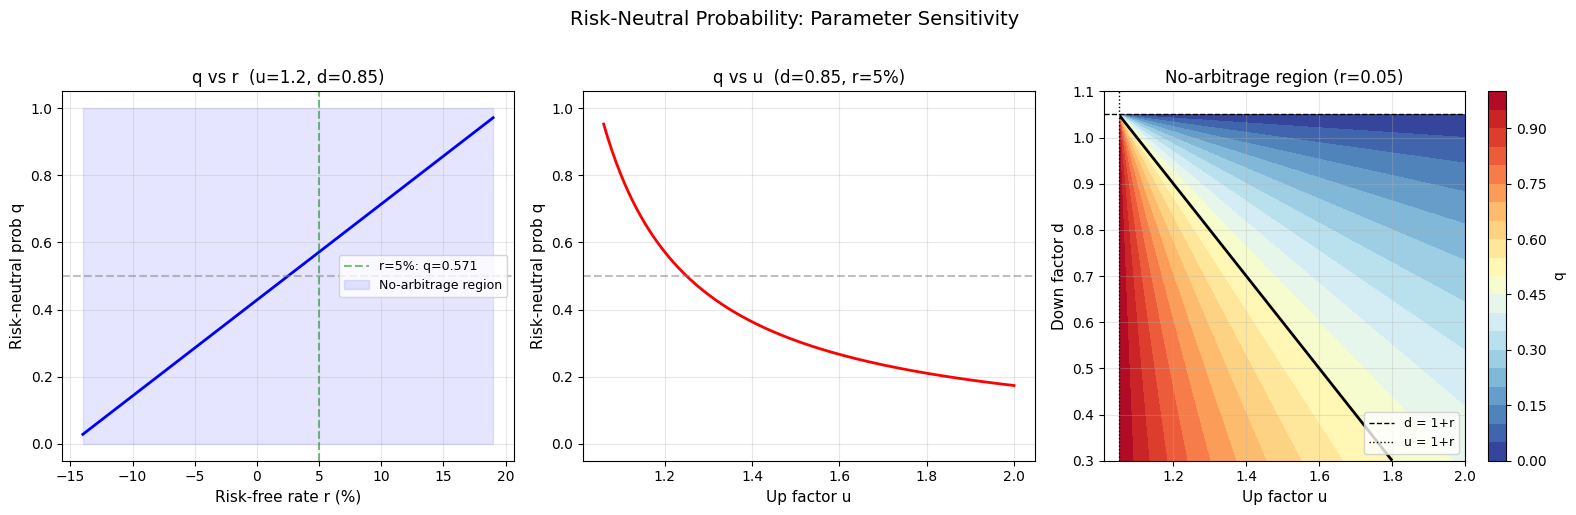

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Panel 1: q vs r
ax = axes[0]
u_val, d_val = 1.2, 0.85
r_range = np.linspace(d_val - 1 + 0.01, u_val - 1 - 0.01, 200)
q_vals = ((1 + r_range) - d_val) / (u_val - d_val)
ax.plot(r_range * 100, q_vals, 'b-', linewidth=2)
ax.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
ax.axvline(5, color='green', linestyle='--', alpha=0.5, label=f'r=5%: q={((1.05)-d_val)/(u_val-d_val):.3f}')
ax.fill_between(r_range * 100, 0, 1, where=(q_vals > 0) & (q_vals < 1),
                alpha=0.1, color='blue', label='No-arbitrage region')
ax.set_xlabel('Risk-free rate r (%)', fontsize=11)
ax.set_ylabel('Risk-neutral prob q', fontsize=11)
ax.set_title('q vs r  (u=1.2, d=0.85)', fontsize=12)
ax.legend(fontsize=9); ax.grid(True, alpha=0.3)
ax.set_ylim(-0.05, 1.05)

# Panel 2: q vs u (with d fixed)
ax = axes[1]
d_val = 0.85
r_val = 0.05
u_range = np.linspace(1 + r_val + 0.01, 2.0, 200)
q_u = ((1 + r_val) - d_val) / (u_range - d_val)
ax.plot(u_range, q_u, 'r-', linewidth=2)
ax.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Up factor u', fontsize=11)
ax.set_ylabel('Risk-neutral prob q', fontsize=11)
ax.set_title('q vs u  (d=0.85, r=5%)', fontsize=12)
ax.grid(True, alpha=0.3); ax.set_ylim(-0.05, 1.05)

# Panel 3: No-arbitrage region in (u, d) space
ax = axes[2]
r_val = 0.05
u_grid = np.linspace(1.01, 2.0, 300)
d_grid = np.linspace(0.3, 1.1, 300)
U, D = np.meshgrid(u_grid, d_grid)
Q = ((1 + r_val) - D) / (U - D)
valid = (Q > 0) & (Q < 1) & (U > D)
ax.contourf(U, D, np.where(valid, Q, np.nan), levels=20, cmap='RdYlBu_r')
ax.contour(U, D, np.where(valid, Q, np.nan), levels=[0.5], colors='black', linewidths=2)
cb = ax.contourf(U, D, np.where(valid, Q, np.nan), levels=20, cmap='RdYlBu_r')
plt.colorbar(cb, ax=ax, label='q')
ax.plot(u_grid, np.full_like(u_grid, 1 + r_val), 'k--', linewidth=1, label='d = 1+r')
ax.plot(np.full_like(d_grid, 1 + r_val), d_grid, 'k:', linewidth=1, label='u = 1+r')
ax.set_xlabel('Up factor u', fontsize=11)
ax.set_ylabel('Down factor d', fontsize=11)
ax.set_title(f'No-arbitrage region (r={r_val})', fontsize=12)
ax.legend(fontsize=9); ax.grid(True, alpha=0.3)

plt.suptitle('Risk-Neutral Probability: Parameter Sensitivity', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Multi-Step Binomial Tree

For $N$ steps, the stock price at node $(n, j)$ is $S_0 u^j d^{n-j}$.
We price by backward induction:

$$V_{n,j} = \frac{q\,V_{n+1,j+1} + (1-q)\,V_{n+1,j}}{1+r}$$

Or equivalently, the closed-form risk-neutral expectation:

$$C_0 = \frac{1}{(1+r)^N} \sum_{j=0}^{N} \binom{N}{j} q^j (1-q)^{N-j} \max(S_0 u^j d^{N-j} - K, 0)$$

N=4 step binomial tree
Risk-neutral q = 0.5200
Tree price:    V0 = 16.0771
Formula price: V0 = 16.0771


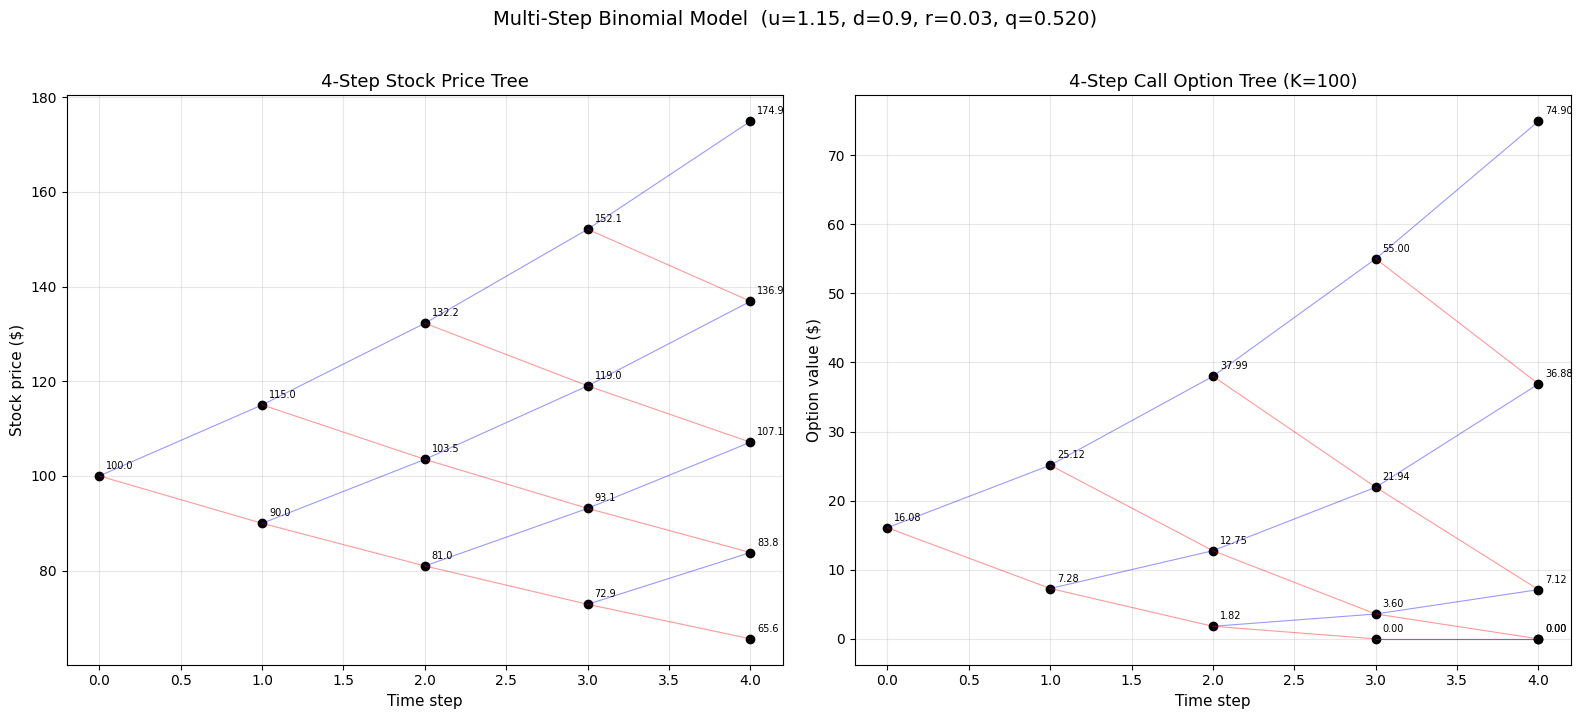

In [4]:
def binomial_tree_price(S0, K, u, d, r, N, option_type='call'):
    """Price a European option via N-step binomial tree (backward induction)."""
    q = ((1 + r) - d) / (u - d)
    
    # Build stock price tree
    stock = np.zeros((N + 1, N + 1))
    for j in range(N + 1):
        stock[j, N] = S0 * u**j * d**(N - j)
    for n in range(N - 1, -1, -1):
        for j in range(n + 1):
            stock[j, n] = S0 * u**j * d**(n - j)
    
    # Terminal payoff
    option = np.zeros((N + 1, N + 1))
    for j in range(N + 1):
        if option_type == 'call':
            option[j, N] = max(stock[j, N] - K, 0)
        else:
            option[j, N] = max(K - stock[j, N], 0)
    
    # Backward induction
    for n in range(N - 1, -1, -1):
        for j in range(n + 1):
            option[j, n] = (q * option[j + 1, n + 1] + (1 - q) * option[j, n + 1]) / (1 + r)
    
    return option[0, 0], stock, option, q


def binomial_formula(S0, K, u, d, r, N):
    """Closed-form risk-neutral expectation."""
    q = ((1 + r) - d) / (u - d)
    price = 0.0
    for j in range(N + 1):
        S_T = S0 * u**j * d**(N - j)
        payoff = max(S_T - K, 0)
        price += comb(N, j, exact=True) * q**j * (1 - q)**(N - j) * payoff
    return price / (1 + r)**N


# --- Price and visualize a 4-step tree ---
N = 4
S0, K, u, d, r = 100, 100, 1.15, 0.90, 0.03
V0_tree, stock, option, q = binomial_tree_price(S0, K, u, d, r, N)
V0_formula = binomial_formula(S0, K, u, d, r, N)

print(f"N={N} step binomial tree")
print(f"Risk-neutral q = {q:.4f}")
print(f"Tree price:    V0 = {V0_tree:.4f}")
print(f"Formula price: V0 = {V0_formula:.4f}")

# Draw the tree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for n in range(N + 1):
    for j in range(n + 1):
        s = S0 * u**j * d**(n - j)
        ax1.plot(n, s, 'ko', markersize=6)
        ax1.annotate(f'{s:.1f}', (n, s), textcoords='offset points',
                     xytext=(5, 5), fontsize=7)
        if n < N:
            s_up = S0 * u**(j + 1) * d**(n - j)
            s_dn = S0 * u**j * d**(n + 1 - j)
            ax1.plot([n, n + 1], [s, s_up], 'b-', alpha=0.4, linewidth=0.8)
            ax1.plot([n, n + 1], [s, s_dn], 'r-', alpha=0.4, linewidth=0.8)

ax1.set_xlabel('Time step', fontsize=11)
ax1.set_ylabel('Stock price ($)', fontsize=11)
ax1.set_title(f'{N}-Step Stock Price Tree', fontsize=13)
ax1.grid(True, alpha=0.3)

for n in range(N + 1):
    for j in range(n + 1):
        v = option[j, n]
        ax2.plot(n, v, 'ko', markersize=6)
        ax2.annotate(f'{v:.2f}', (n, v), textcoords='offset points',
                     xytext=(5, 5), fontsize=7)
        if n < N:
            ax2.plot([n, n + 1], [option[j, n], option[j + 1, n + 1]],
                     'b-', alpha=0.4, linewidth=0.8)
            ax2.plot([n, n + 1], [option[j, n], option[j, n + 1]],
                     'r-', alpha=0.4, linewidth=0.8)

ax2.set_xlabel('Time step', fontsize=11)
ax2.set_ylabel('Option value ($)', fontsize=11)
ax2.set_title(f'{N}-Step Call Option Tree (K={K})', fontsize=13)
ax2.grid(True, alpha=0.3)

plt.suptitle(f'Multi-Step Binomial Model  (u={u}, d={d}, r={r}, q={q:.3f})', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Convergence to Black-Scholes

As $N \to \infty$ with $u = e^{\sigma\sqrt{T/N}}$, $d = e^{-\sigma\sqrt{T/N}}$, and
$r_\text{period} = r_{\text{annual}} \cdot T/N$, the binomial price converges to the
Black-Scholes price. This is the **CRR (Cox-Ross-Rubinstein)** parameterization.

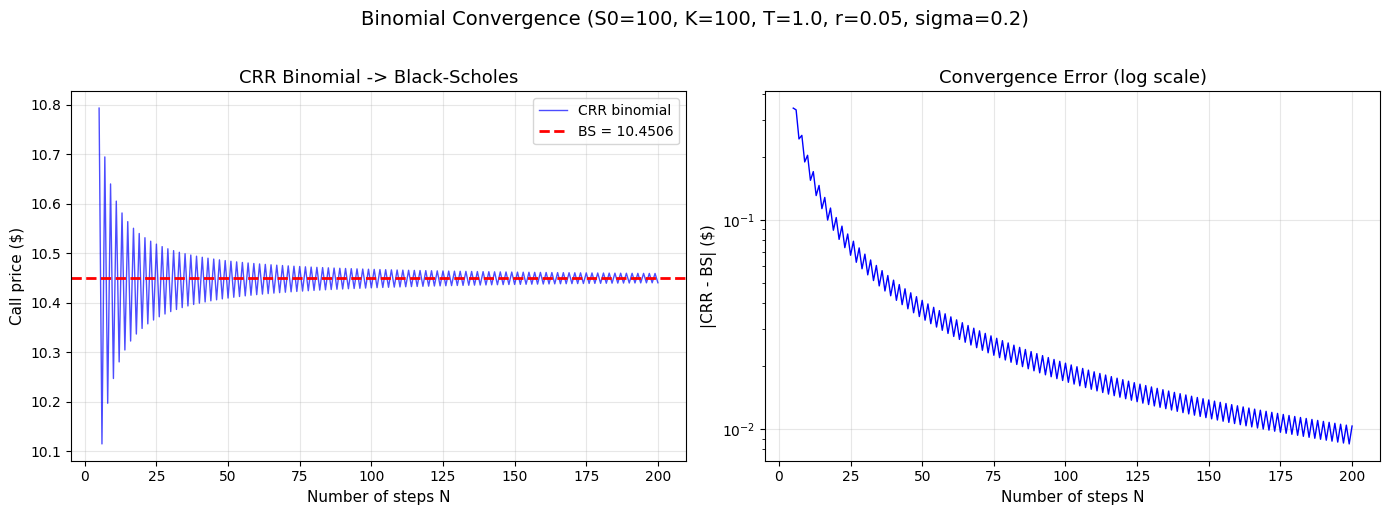

In [5]:
from scipy.stats import norm

def bs_call(S, K, T, r, sigma):
    """Black-Scholes call price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


# CRR convergence
S0, K, T, r_annual, sigma = 100, 100, 1.0, 0.05, 0.20
bs_price = bs_call(S0, K, T, r_annual, sigma)

N_values = np.arange(5, 201, 1)
crr_prices = []

for N in N_values:
    dt = T / N
    u_crr = np.exp(sigma * np.sqrt(dt))
    d_crr = np.exp(-sigma * np.sqrt(dt))
    r_period = r_annual * dt
    price, _, _, _ = binomial_tree_price(S0, K, u_crr, d_crr, r_period, N)
    crr_prices.append(price)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(N_values, crr_prices, 'b-', linewidth=1, alpha=0.7, label='CRR binomial')
ax1.axhline(bs_price, color='red', linestyle='--', linewidth=2, label=f'BS = {bs_price:.4f}')
ax1.set_xlabel('Number of steps N', fontsize=11)
ax1.set_ylabel('Call price ($)', fontsize=11)
ax1.set_title('CRR Binomial -> Black-Scholes', fontsize=13)
ax1.legend(fontsize=10); ax1.grid(True, alpha=0.3)

ax2.semilogy(N_values, np.abs(np.array(crr_prices) - bs_price), 'b-', linewidth=1)
ax2.set_xlabel('Number of steps N', fontsize=11)
ax2.set_ylabel('|CRR - BS| ($)', fontsize=11)
ax2.set_title('Convergence Error (log scale)', fontsize=13)
ax2.grid(True, alpha=0.3)

plt.suptitle(f'Binomial Convergence (S0={S0}, K={K}, T={T}, r={r_annual}, sigma={sigma})',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Arbitrage-Free <=> Risk-Neutral Measure Exists

The **First Fundamental Theorem of Asset Pricing** (discrete version):

> The market is arbitrage-free if and only if there exists a probability measure $\mathbb{Q} \sim \mathbb{P}$
> such that discounted asset prices are $\mathbb{Q}$-martingales.

We verify both directions:
- If $d < 1+r < u$, then $q \in (0,1)$: a valid measure exists, no arbitrage.
- If $1+r \geq u$ or $1+r \leq d$: no valid $q$ exists, and we can construct an arbitrage.

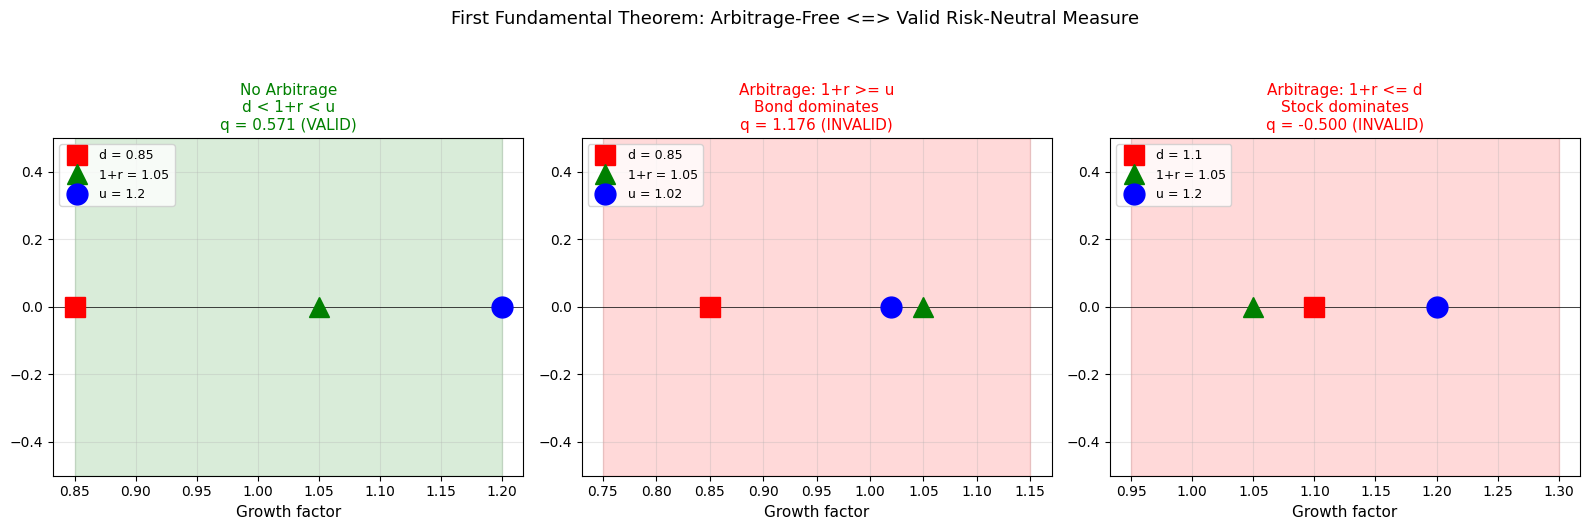

=== Arbitrage demonstration (bond dominates: 1+r >= u) ===
Strategy: short 1 share at 100, invest 100 in bond
  If up:   bond = 105.00, buy back stock at 102.00, profit = 3.00
  If down: bond = 105.00, buy back stock at 85.00, profit = 20.00
  Risk-free profit in BOTH states!


In [6]:
def check_arbitrage(S0, u, d, r):
    """Check arbitrage conditions and demonstrate if one exists."""
    q = ((1 + r) - d) / (u - d)
    
    if 0 < q < 1:
        return 'no_arbitrage', q
    elif (1 + r) >= u:
        # Bond dominates stock in all states: short stock, buy bond
        return 'bond_dominates', q
    else:
        # Stock dominates bond in all states: short bond, buy stock
        return 'stock_dominates', q


# Three scenarios
scenarios = [
    {'label': 'No Arbitrage\nd < 1+r < u', 'u': 1.20, 'd': 0.85, 'r': 0.05},
    {'label': 'Arbitrage: 1+r >= u\nBond dominates', 'u': 1.02, 'd': 0.85, 'r': 0.05},
    {'label': 'Arbitrage: 1+r <= d\nStock dominates', 'u': 1.20, 'd': 1.10, 'r': 0.05},
]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
S0 = 100

for ax, sc in zip(axes, scenarios):
    u, d, r = sc['u'], sc['d'], sc['r']
    status, q = check_arbitrage(S0, u, d, r)
    
    # Plot number line showing d, 1+r, u
    vals = sorted([d, 1 + r, u])
    margin = 0.1
    x_range = np.linspace(vals[0] - margin, vals[-1] + margin, 100)
    
    ax.axhline(0, color='black', linewidth=0.5)
    ax.plot(d, 0, 'rs', markersize=15, label=f'd = {d}')
    ax.plot(1 + r, 0, 'g^', markersize=15, label=f'1+r = {1+r}')
    ax.plot(u, 0, 'bo', markersize=15, label=f'u = {u}')
    
    if status == 'no_arbitrage':
        ax.axvspan(d, u, alpha=0.15, color='green')
        ax.set_title(f'{sc["label"]}\nq = {q:.3f} (VALID)', fontsize=11, color='green')
    else:
        ax.axvspan(vals[0] - margin, vals[-1] + margin, alpha=0.15, color='red')
        ax.set_title(f'{sc["label"]}\nq = {q:.3f} (INVALID)', fontsize=11, color='red')
    
    ax.legend(fontsize=9, loc='upper left')
    ax.set_xlabel('Growth factor', fontsize=11)
    ax.set_ylim(-0.5, 0.5)
    ax.grid(True, alpha=0.3)

plt.suptitle('First Fundamental Theorem: Arbitrage-Free <=> Valid Risk-Neutral Measure',
             fontsize=13, y=1.05)
plt.tight_layout()
plt.show()

# Demonstrate arbitrage profit
print("=== Arbitrage demonstration (bond dominates: 1+r >= u) ===")
u, d, r = 1.02, 0.85, 0.05
print(f"Strategy: short 1 share at {S0}, invest {S0} in bond")
print(f"  If up:   bond = {S0*(1+r):.2f}, buy back stock at {S0*u:.2f}, profit = {S0*(1+r) - S0*u:.2f}")
print(f"  If down: bond = {S0*(1+r):.2f}, buy back stock at {S0*d:.2f}, profit = {S0*(1+r) - S0*d:.2f}")
print(f"  Risk-free profit in BOTH states!")

## Discounted Price is a Q-Martingale

Under $\mathbb{Q}$, the discounted stock price $\tilde{S}_n = S_n / (1+r)^n$ satisfies
$\mathbb{E}^{\mathbb{Q}}[\tilde{S}_{n+1} | \mathcal{F}_n] = \tilde{S}_n$.

We verify this numerically by simulating many paths and checking the martingale property.

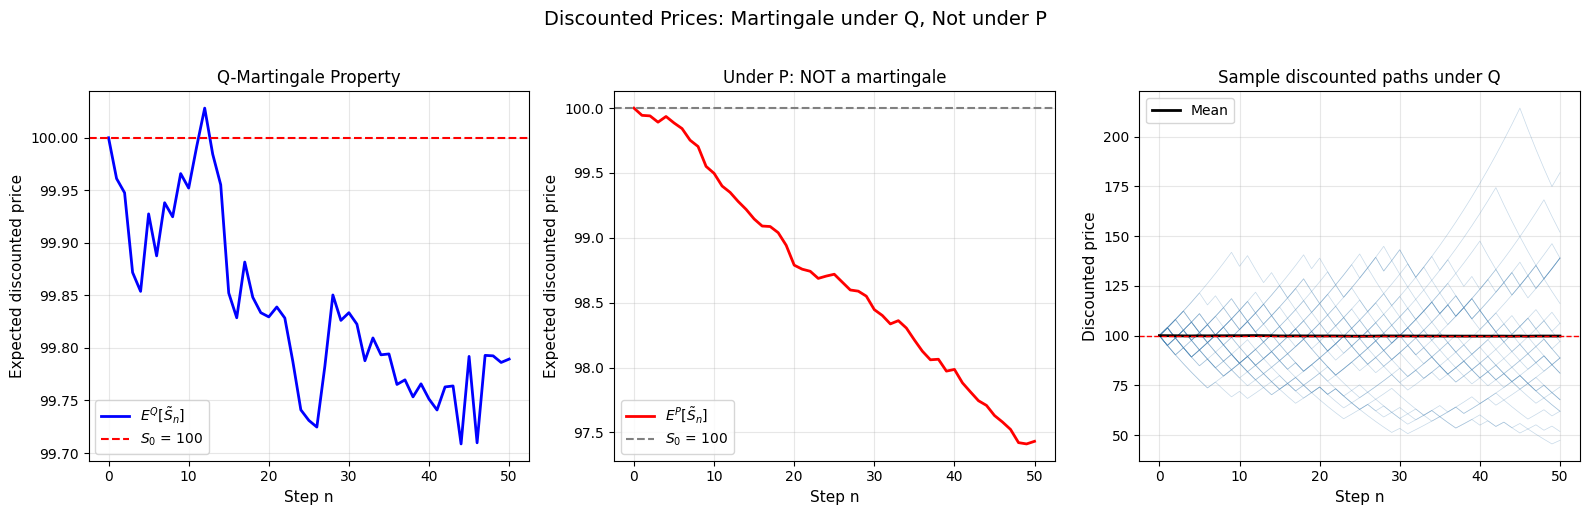

In [7]:
np.random.seed(42)
N = 50
n_paths = 10000
S0 = 100
u, d, r = 1.05, 0.96, 0.01
q = ((1 + r) - d) / (u - d)
p_real = 0.55  # physical probability of up move

# Simulate under Q
moves_Q = np.random.binomial(1, q, (n_paths, N))
factors_Q = np.where(moves_Q, u, d)
prices_Q = S0 * np.cumprod(factors_Q, axis=1)
prices_Q = np.column_stack([np.full(n_paths, S0), prices_Q])

# Simulate under P (physical measure)
moves_P = np.random.binomial(1, p_real, (n_paths, N))
factors_P = np.where(moves_P, u, d)
prices_P = S0 * np.cumprod(factors_P, axis=1)
prices_P = np.column_stack([np.full(n_paths, S0), prices_P])

# Discount factors
disc = (1 + r) ** np.arange(N + 1)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Panel 1: Q-expected discounted price at each step
ax = axes[0]
disc_prices_Q = prices_Q / disc
expected_disc_Q = np.mean(disc_prices_Q, axis=0)
ax.plot(expected_disc_Q, 'b-', linewidth=2, label=r'$E^Q[\tilde{S}_n]$')
ax.axhline(S0, color='red', linestyle='--', linewidth=1.5, label=f'$S_0$ = {S0}')
ax.set_xlabel('Step n', fontsize=11)
ax.set_ylabel('Expected discounted price', fontsize=11)
ax.set_title('Q-Martingale Property', fontsize=12)
ax.legend(fontsize=10); ax.grid(True, alpha=0.3)

# Panel 2: P-expected discounted price (NOT a martingale)
ax = axes[1]
disc_prices_P = prices_P / disc
expected_disc_P = np.mean(disc_prices_P, axis=0)
ax.plot(expected_disc_P, 'r-', linewidth=2, label=r'$E^P[\tilde{S}_n]$')
ax.axhline(S0, color='gray', linestyle='--', linewidth=1.5, label=f'$S_0$ = {S0}')
ax.set_xlabel('Step n', fontsize=11)
ax.set_ylabel('Expected discounted price', fontsize=11)
ax.set_title('Under P: NOT a martingale', fontsize=12)
ax.legend(fontsize=10); ax.grid(True, alpha=0.3)

# Panel 3: Sample paths of discounted price under Q
ax = axes[2]
for i in range(30):
    ax.plot(disc_prices_Q[i], alpha=0.3, linewidth=0.5, color='steelblue')
ax.plot(expected_disc_Q, 'k-', linewidth=2, label='Mean')
ax.axhline(S0, color='red', linestyle='--', linewidth=1)
ax.set_xlabel('Step n', fontsize=11)
ax.set_ylabel('Discounted price', fontsize=11)
ax.set_title('Sample discounted paths under Q', fontsize=12)
ax.legend(fontsize=10); ax.grid(True, alpha=0.3)

plt.suptitle('Discounted Prices: Martingale under Q, Not under P', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Replication argument:** The no-arbitrage price of a derivative equals the cost of the replicating portfolio. The physical probability $p$ is irrelevant for pricing.
2. **Risk-neutral probability:** $q = \frac{(1+r) - d}{u - d}$ is the unique probability making the discounted stock a martingale.
3. **FTAP (discrete):** Arbitrage-free $\iff$ there exists a risk-neutral measure $\mathbb{Q} \sim \mathbb{P}$. Complete market $\iff$ $\mathbb{Q}$ is unique.
4. **CRR convergence:** As $N \to \infty$, the binomial model converges to Black-Scholes, connecting the discrete and continuous theories.
5. **Martingale property:** Under $\mathbb{Q}$, discounted prices are martingales; under $\mathbb{P}$ they generally are not.